In [1]:
import pandas_datareader as pdr
import pandas as pd
import plotly.express as px
from datetime import datetime, timedelta

In [2]:
start = datetime.now() + timedelta(weeks=-60)
end = datetime.now()

df = pdr.DataReader('CPIAUCSL', 'fred', start, end)
df = df.rename(columns={'CPIAUCSL':'CPI'})
df['Monthly % Change'] = 100*df['CPI'].pct_change(axis=0).round(decimals=3)

display(df)

,CPI,Monthly % Change
DATE,,
2020-04-01,256.192,NaN
2020-05-01,255.942,-0.1
2020-06-01,257.282,0.5
2020-07-01,258.604,0.5
2020-08-01,259.511,0.4
2020-09-01,260.149,0.2
2020-10-01,260.462,0.1
2020-11-01,260.927,0.2
2020-12-01,261.560,0.2


In [3]:
percent_change_YoY = 100*(df['CPI'].iloc[-1]/df['CPI'].iloc[0]-1).round(decimals=3)

display(percent_change_YoY)

4.2

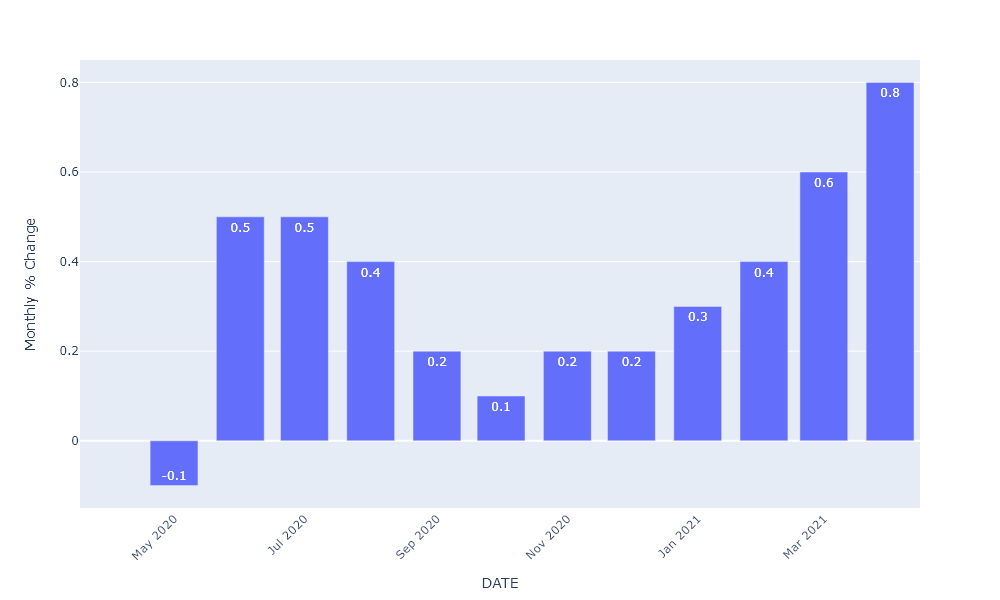

In [4]:
fig = px.bar(df, y='Monthly % Change',
                 text='Monthly % Change')

fig.update_traces(textposition='inside')
fig.update_layout(xaxis_tickangle=-45)

fig.show(renderer='png', width=1000, height=600)